## Değişkenler
**KURUM ADI**: okul_adi  
**Toplam Öğrenci Sayısı**: ogr_sayisi  
**Taşımalı Öğrenci Sayısı**: tasimali_ogr_say  
**Toplam Kapalı Bina Alanı**: bina_alani  
**Toplam Bahçe Alanı**: bahce_alani  
**Toplam Kapalı Spor Alanı**: kapali_spor_alani  
**Toplam Açık Spor Alanı**: acik_spor_alani  
**Toplam Kantin Alanı**: kantin_alani  
**Çok Amaçlı Salon Var Mı?**: cok_amacli_salon  
**Toplam Aktif Derslik Sayısı Nedir?**: derslik_sayisi  
**Personelin Ortalama Hizmet Süresi Nedir?**: personel_hizmet_suresi  
**Personelin Ortalama Yaşı Nedir?**: personel_yas  
**Doktora Öğrenimine Devam Eden Personel Sayısı**: doktora_devam_personel  
**Doktora Mezunu Personel Sayısı**: doktora_mezunu  
**Yüksek Lisansına Devam Eden Personel Sayısı**: yuksek_devam  
**Yüksek Lisans Mezunu Personel Sayısı**: yuksek_mezun  
**Tasarım Beceri Atölyesi Var Mı?**: tasarim_atolyesi  
**Fen Laboratuvarı Var Mı?**: fen_laboratuvari  
**Bilişim Teknolojileri Laboratuvarı Var Mı?**: bilisim_laboratuvari



# Okul Verilerinin Çekilmesi

In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error
from xgboost import XGBRegressor
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import plot_confusion_matrix

In [ ]:
os.chdir("/content/drive/MyDrive/Works/Bitirme")

In [ ]:
data_file = "Data/Liseler.xlsx"
data_original = pd.read_excel(data_file)
df_okullar = data_original.copy()
#df = df.drop(columns=["okuladi", "okulno"])
df_okullar.head()

,okul_adi,ogr_sayisi,tasimali_ogr_say,bina_alani,bahce_alani,kapali_spor_alani,acik_spor_alani,kantin_alani,cok_amacli_salon,tasarim_atolyesi,fen_laboratuvari,bilisim_laboratuvari,derslik_sayisi,personel_hizmet_suresi,personel_yas,yuksek_devam,yuksek_mezun,doktora_devam_personel,doktora_mezunu
0,OKUL1,629,0,3225.0,650.0,310,1000.0,50.0,EVET,HAYIR,EVET,HAYIR,25,21.00,41.00,0,14,0,0
1,OKUL2,491,27,2550.0,14472.0,150,14000.0,50.0,HAYIR,HAYIR,HAYIR,HAYIR,16,11.00,38.00,0,7,0,0
2,OKUL3,653,30,800.0,2538.5,0,1102.5,120.0,HAYIR,HAYIR,HAYIR,HAYIR,18,14.41,38.94,0,12,0,0
3,OKUL4,980,0,6492.0,8000.0,0,300.0,150.0,HAYIR,HAYIR,EVET,HAYIR,39,15.00,40.00,2,9,1,0
4,OKUL5,157,0,1800.0,5435.0,0,0.0,300.0,HAYIR,EVET,HAYIR,HAYIR,31,21.00,45.00,0,7,1,0


## Evet->1 Hayır->0 olacak şekilde düzeltme

In [ ]:
def evet_hayir(degisken):
  for i in df_okullar[degisken].index:
    if df_okullar[degisken][i] =="EVET":
      df_okullar[degisken][i] = 1
    elif df_okullar[degisken][i]=="HAYIR":
      df_okullar[degisken][i]=0

In [ ]:
evet_hayir("cok_amacli_salon")
evet_hayir("tasarim_atolyesi")
evet_hayir("fen_laboratuvari")
evet_hayir("bilisim_laboratuvari")

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
df_okullar

,okul_adi,ogr_sayisi,tasimali_ogr_say,bina_alani,bahce_alani,kapali_spor_alani,acik_spor_alani,kantin_alani,cok_amacli_salon,tasarim_atolyesi,fen_laboratuvari,bilisim_laboratuvari,derslik_sayisi,personel_hizmet_suresi,personel_yas,yuksek_devam,yuksek_mezun,doktora_devam_personel,doktora_mezunu
0,OKUL1,629,0,3225.00,650.00,310,1000.0,50.00,1,0,1,0,25,21.00,41.00,0,14,0,0
1,OKUL2,491,27,2550.00,14472.00,150,14000.0,50.00,0,0,0,0,16,11.00,38.00,0,7,0,0
2,OKUL3,653,30,800.00,2538.50,0,1102.5,120.00,0,0,0,0,18,14.41,38.94,0,12,0,0
3,OKUL4,980,0,6492.00,8000.00,0,300.0,150.00,0,0,1,0,39,15.00,40.00,2,9,1,0
4,OKUL5,157,0,1800.00,5435.00,0,0.0,300.00,0,1,0,0,31,21.00,45.00,0,7,1,0
5,OKUL6,607,65,2100.00,4500.00,0,2200.0,80.00,0,0,1,0,19,15.00,35.00,2,7,1,0
6,OKUL7,580,210,720.00,6000.00,820,50.0,30.00,0,0,0,1,21,5.00,35.00,1,2,1,0
7,OKUL8,615,0,2660.00,4462.00,692,262.0,72.00,1,0,1,0,19,19.00,44.00,0,11,1,0
8,OKUL9,648,172,1107.00,7350.00,128,700.0,85.00,1,1,1,0,19,15.00,37.00,2,8,0,0
9,OKUL10,419,82,543.55,1624.47,0,0.0,32.00,0,0,0,0,18,9.00,35.00,2,3,0,0


# Aykırı Değerlerin Tespiti

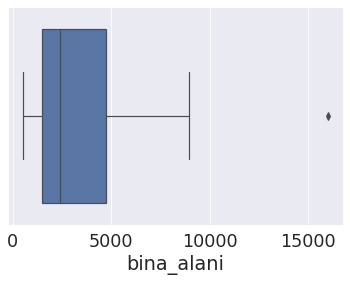

In [ ]:
sns.boxplot(x = df_okullar.bina_alani)

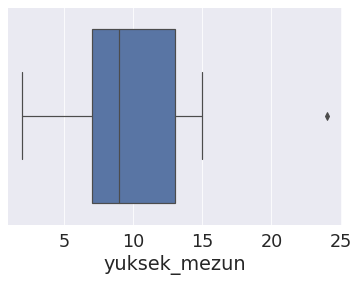

In [ ]:
sns.boxplot(x = df_okullar.yuksek_mezun)

#Not Verileri Çekilmesi

In [ ]:
data_file = "Data/Veriseti_Anadolu_Liseleri.xlsx"
data_original = pd.read_excel(data_file)
df_notlar = data_original.copy()
#df = df.drop(columns=["okuladi", "okulno"])
df_notlar

,okuladi,okulno,cinsiyet,Asag,Bsag,Aoz,Boz,ABayri,Abirlikte,Aogrenim,Bogrenim,Acalisma,Bcalisma,gelir,kardes,oda,hastalik,uyku,internet,televizyon,eba_tv,oyun,ders_calisma,okul_dyk,ozel_kurs,sosyal_kulturel,ortaokul_turu,ortaokul_kurs,ortaokul_ozelders,lgs_puani,ortaokul_puani,turkce9,mat9,ort9,ort10,ort11
0,OKUL1,okulno0001,0,0,0,0,0,0,0,4,4,1,2,3,3,1,1,3,5,1,2,4,2,0,1,0,0,0,0,377.000000,93.4088,56.45,55.63,68.43,70.77,74.38
1,OKUL1,okulno0002,0,0,0,0,0,0,0,2,6,1,0,3,2,0,1,3,4,1,3,2,2,1,1,0,0,1,1,393.000000,80.0000,58.63,48.63,67.78,71.45,74.89
2,OKUL1,okulno0003,0,0,0,0,0,0,0,3,4,1,2,3,3,0,1,3,1,2,2,2,3,1,0,0,0,0,1,390.000000,90.0000,81.13,87.25,83.29,86.07,40.46
3,OKUL1,okulno0004,0,0,0,0,0,0,0,7,4,0,0,3,2,0,1,2,5,1,1,1,2,1,1,1,1,0,0,378.000000,80.0000,51.38,33.13,63.78,61.94,62.92
4,OKUL1,okulno0005,0,0,1,0,0,1,0,2,4,0,1,2,2,0,0,3,5,1,2,1,1,0,1,0,0,0,1,394.601327,86.0000,72.25,58.75,69.24,70.90,77.12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1079,OKUL27,okulno1080,0,0,0,0,0,0,0,3,4,0,0,3,3,1,1,0,3,3,1,2,3,0,1,0,0,1,1,439.000000,95.0000,85.85,81.50,81.92,79.03,74.60
1080,OKUL27,okulno1081,0,0,0,0,0,0,0,5,6,1,0,4,3,1,1,3,2,2,2,2,3,1,0,1,0,1,1,426.000000,91.0000,77.25,72.00,77.08,74.29,71.49
1081,OKUL27,okulno1082,1,0,0,0,0,0,0,3,3,1,2,1,2,0,1,3,1,2,2,1,3,1,1,1,0,0,0,410.000000,93.3000,70.33,83.50,73.33,83.45,82.51
1082,OKUL27,okulno1083,0,0,0,0,0,0,0,3,4,1,0,2,3,1,1,2,3,1,2,1,2,1,1,0,0,1,1,407.000000,95.0000,68.25,65.15,74.63,71.63,71.81


In [ ]:
df_notlar["okuladi"].value_counts()

OKUL11    87
OKUL17    78
OKUL1     76
OKUL12    67
OKUL14    64
OKUL7     63
OKUL18    56
OKUL21    56
OKUL22    56
OKUL13    53
OKUL2     48
OKUL27    39
OKUL19    37
OKUL24    36
OKUL9     33
OKUL3     29
OKUL25    28
OKUL15    26
OKUL20    24
OKUL6     23
OKUL10    21
OKUL23    19
OKUL4     18
OKUL16    15
OKUL26    14
OKUL5     10
OKUL8      8
Name: okuladi, dtype: int64

##30'dan fazla veri içeren okulların tespit edilmesi

In [ ]:
df_not_okul = pd.DataFrame(df_notlar["okuladi"].value_counts() > 29)
df_not_okul

,okuladi
OKUL11,True
OKUL17,True
OKUL1,True
OKUL12,True
OKUL14,True
OKUL7,True
OKUL18,True
OKUL21,True
OKUL22,True
OKUL13,True


In [ ]:
df_not_okul = df_not_okul.index[df_not_okul['okuladi'] == True].tolist()

30'dan fazla veri içeren okul isimleri;

In [ ]:
df_not_okul

['OKUL11',
 'OKUL17',
 'OKUL1',
 'OKUL12',
 'OKUL14',
 'OKUL7',
 'OKUL18',
 'OKUL21',
 'OKUL22',
 'OKUL13',
 'OKUL2',
 'OKUL27',
 'OKUL19',
 'OKUL24',
 'OKUL9']

### Bu okullara ait öğrenci bilgilerinin çekilmesi

In [ ]:
value_list = df_not_okul
boolean_series = df_notlar.okuladi.isin(value_list)
filtered_df = df_notlar[boolean_series]

In [ ]:
filtered_df

,okuladi,okulno,cinsiyet,Asag,Bsag,Aoz,Boz,ABayri,Abirlikte,Aogrenim,Bogrenim,Acalisma,Bcalisma,gelir,kardes,oda,hastalik,uyku,internet,televizyon,eba_tv,oyun,ders_calisma,okul_dyk,ozel_kurs,sosyal_kulturel,ortaokul_turu,ortaokul_kurs,ortaokul_ozelders,lgs_puani,ortaokul_puani,turkce9,mat9,ort9,ort10,ort11
0,OKUL1,okulno0001,0,0,0,0,0,0,0,4,4,1,2,3,3,1,1,3,5,1,2,4,2,0,1,0,0,0,0,377.000000,93.4088,56.45,55.63,68.43,70.77,74.38
1,OKUL1,okulno0002,0,0,0,0,0,0,0,2,6,1,0,3,2,0,1,3,4,1,3,2,2,1,1,0,0,1,1,393.000000,80.0000,58.63,48.63,67.78,71.45,74.89
2,OKUL1,okulno0003,0,0,0,0,0,0,0,3,4,1,2,3,3,0,1,3,1,2,2,2,3,1,0,0,0,0,1,390.000000,90.0000,81.13,87.25,83.29,86.07,40.46
3,OKUL1,okulno0004,0,0,0,0,0,0,0,7,4,0,0,3,2,0,1,2,5,1,1,1,2,1,1,1,1,0,0,378.000000,80.0000,51.38,33.13,63.78,61.94,62.92
4,OKUL1,okulno0005,0,0,1,0,0,1,0,2,4,0,1,2,2,0,0,3,5,1,2,1,1,0,1,0,0,0,1,394.601327,86.0000,72.25,58.75,69.24,70.90,77.12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1079,OKUL27,okulno1080,0,0,0,0,0,0,0,3,4,0,0,3,3,1,1,0,3,3,1,2,3,0,1,0,0,1,1,439.000000,95.0000,85.85,81.50,81.92,79.03,74.60
1080,OKUL27,okulno1081,0,0,0,0,0,0,0,5,6,1,0,4,3,1,1,3,2,2,2,2,3,1,0,1,0,1,1,426.000000,91.0000,77.25,72.00,77.08,74.29,71.49
1081,OKUL27,okulno1082,1,0,0,0,0,0,0,3,3,1,2,1,2,0,1,3,1,2,2,1,3,1,1,1,0,0,0,410.000000,93.3000,70.33,83.50,73.33,83.45,82.51
1082,OKUL27,okulno1083,0,0,0,0,0,0,0,3,4,1,0,2,3,1,1,2,3,1,2,1,2,1,1,0,0,1,1,407.000000,95.0000,68.25,65.15,74.63,71.63,71.81


# Aykırı Değer Tespiti

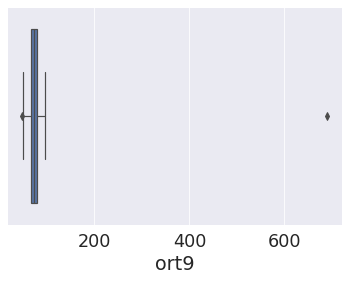

In [ ]:
sns.boxplot(x = filtered_df.ort9)

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


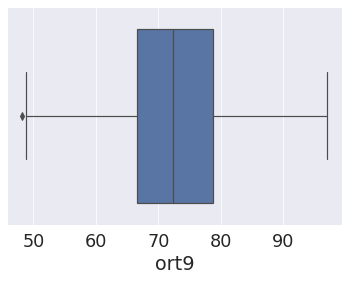

In [ ]:
Q1 = filtered_df.ort9.quantile(0.25)
Q3 = filtered_df.ort9.quantile(0.75)
IQR = Q3-Q1
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR
filtered_df.loc[filtered_df["ort9"] > upper,"ort9"] = upper

sns.boxplot(x = filtered_df.ort9)

### Okulların gruplanması ve verilerin ortalamalarının alınması

In [ ]:
df_group = filtered_df.groupby("okuladi")

In [ ]:
df_group.mean()

,cinsiyet,Asag,Bsag,Aoz,Boz,ABayri,Abirlikte,Aogrenim,Bogrenim,Acalisma,Bcalisma,gelir,kardes,oda,hastalik,uyku,internet,televizyon,eba_tv,oyun,ders_calisma,okul_dyk,ozel_kurs,sosyal_kulturel,ortaokul_turu,ortaokul_kurs,ortaokul_ozelders,lgs_puani,ortaokul_puani,turkce9,mat9,ort9,ort10,ort11
okuladi,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
OKUL1,0.000000,0.026316,0.026316,0.0,0.000000,0.131579,0.026316,2.842105,3.263158,0.736842,0.368421,2.789474,2.828947,0.302632,0.947368,2.460526,3.302632,1.881579,1.868421,1.671053,2.210526,0.565789,0.763158,0.342105,0.039474,0.473684,0.802632,383.301310,85.530186,64.727763,55.698553,70.091447,69.959342,70.082632
OKUL11,0.517241,0.011494,0.022989,0.0,0.000000,0.137931,0.011494,2.701149,3.287356,0.850575,0.367816,2.942529,2.724138,0.218391,0.896552,2.413793,3.252874,1.827586,1.643678,2.034483,1.781609,0.517241,0.793103,0.517241,0.000000,0.586207,0.839080,393.359919,85.938734,62.759770,59.796552,70.007241,68.722989,67.395057
OKUL12,0.373134,0.000000,0.029851,0.0,0.014925,0.089552,0.029851,2.731343,3.149254,0.791045,0.492537,2.805970,2.805970,0.164179,0.940299,2.656716,3.059701,1.970149,2.089552,2.149254,1.880597,0.507463,0.701493,0.432836,0.000000,0.477612,0.820896,387.949383,86.327079,68.015970,56.569403,68.208879,67.691796,74.197327
OKUL13,0.264151,0.000000,0.000000,0.0,0.018868,0.094340,0.000000,2.660377,2.867925,0.924528,0.509434,2.415094,3.037736,0.283019,0.849057,2.603774,2.754717,1.886792,1.830189,1.698113,2.075472,0.415094,0.943396,0.471698,0.018868,0.339623,0.867925,434.828675,92.652113,77.636038,63.681321,79.296226,79.370566,80.599434
OKUL14,0.328125,0.015625,0.031250,0.0,0.000000,0.062500,0.000000,2.687500,3.093750,0.921875,0.515625,2.656250,2.843750,0.187500,0.906250,2.734375,3.031250,2.062500,1.953125,1.796875,1.812500,0.390625,0.828125,0.468750,0.000000,0.328125,0.937500,403.235214,87.575313,61.552344,55.559063,70.749453,70.699062,72.205000
OKUL17,0.397436,0.012821,0.038462,0.0,0.000000,0.051282,0.000000,2.717949,3.269231,0.794872,0.320513,2.782051,2.602564,0.166667,0.987179,2.589744,2.961538,2.051282,2.076923,1.948718,2.102564,0.589744,0.884615,0.371795,0.025641,0.448718,0.884615,382.245213,84.820513,70.692308,56.471795,74.575469,71.576442,72.007403
OKUL18,0.303571,0.017857,0.035714,0.0,0.000000,0.107143,0.053571,2.982143,3.517857,0.750000,0.500000,2.964286,2.642857,0.160714,0.928571,2.732143,3.107143,1.589286,1.767857,1.964286,2.517857,0.589286,0.660714,0.357143,0.000000,0.428571,0.821429,412.100073,90.024804,67.997500,71.876250,73.954107,73.140979,77.595355
OKUL19,0.459459,0.000000,0.000000,0.0,0.000000,0.108108,0.027027,2.918919,4.000000,0.702703,0.216216,3.216216,2.486486,0.081081,0.918919,2.810811,3.243243,1.648649,2.027027,2.216216,2.081081,0.594595,0.729730,0.351351,0.027027,0.351351,0.891892,426.205073,91.283784,65.674595,65.180541,73.824595,73.309459,80.314865
OKUL2,0.270833,0.000000,0.020833,0.0,0.000000,0.083333,0.000000,2.458333,3.020833,0.687500,0.270833,2.833333,3.187500,0.229167,0.916667,2.791667,2.687500,1.958333,1.833333,2.000000,2.020833,0.583333,0.708333,0.416667,0.000000,0.416667,0.916667,427.263677,91.121675,78.276042,77.463542,76.481458,73.997917,79.329375


In [ ]:
ortalama_df = pd.DataFrame(df_group.mean())

###Sene sonu notlarının okullardaki ortalamaları

In [ ]:
okul_ortalamalari = pd.DataFrame(ortalama_df.iloc[:, -3:].mean(axis=1), columns=["ortalamalar"])

In [ ]:
okul_ortalamalari = okul_ortalamalari.reset_index()

In [ ]:
okul_ortalamalari = okul_ortalamalari.sort_values("ortalamalar")

In [ ]:
okul_ortalamalari = okul_ortalamalari.reset_index()
okul_ortalamalari = okul_ortalamalari.iloc[:, -2:]

In [ ]:
okul_ortalamalari

,okuladi,ortalamalar
0,OKUL22,65.365362
1,OKUL11,68.708429
2,OKUL7,69.271958
3,OKUL9,69.922614
4,OKUL12,70.032667
5,OKUL1,70.044474
6,OKUL24,70.745463
7,OKUL14,71.217839
8,OKUL17,72.719771
9,OKUL27,73.921368


###Sene sonu ortalamalarının yanına lgs_puani, ortaokul_puani, turkce9 ve mat9 sütunlarını da ekleyelim;

In [ ]:
tum_ortalamalar = ortalama_df[["lgs_puani", "ortaokul_puani", "turkce9", "mat9"]]

In [ ]:
tum_ortalamalar = tum_ortalamalar.reset_index()

In [ ]:
tum_ortalamalar

,okuladi,lgs_puani,ortaokul_puani,turkce9,mat9
0,OKUL1,383.301310,85.530186,64.727763,55.698553
1,OKUL11,393.359919,85.938734,62.759770,59.796552
2,OKUL12,387.949383,86.327079,68.015970,56.569403
3,OKUL13,434.828675,92.652113,77.636038,63.681321
4,OKUL14,403.235214,87.575313,61.552344,55.559063
5,OKUL17,382.245213,84.820513,70.692308,56.471795
6,OKUL18,412.100073,90.024804,67.997500,71.876250
7,OKUL19,426.205073,91.283784,65.674595,65.180541
8,OKUL2,427.263677,91.121675,78.276042,77.463542
9,OKUL21,435.687860,91.819750,73.204464,62.741429


In [ ]:
tum_ortalamalar = tum_ortalamalar.iloc[:, -5:]

In [ ]:
tum_ortalamalar

,okuladi,lgs_puani,ortaokul_puani,turkce9,mat9
0,OKUL1,383.301310,85.530186,64.727763,55.698553
1,OKUL11,393.359919,85.938734,62.759770,59.796552
2,OKUL12,387.949383,86.327079,68.015970,56.569403
3,OKUL13,434.828675,92.652113,77.636038,63.681321
4,OKUL14,403.235214,87.575313,61.552344,55.559063
5,OKUL17,382.245213,84.820513,70.692308,56.471795
6,OKUL18,412.100073,90.024804,67.997500,71.876250
7,OKUL19,426.205073,91.283784,65.674595,65.180541
8,OKUL2,427.263677,91.121675,78.276042,77.463542
9,OKUL21,435.687860,91.819750,73.204464,62.741429


In [ ]:
okul_ortalamalari = pd.merge(tum_ortalamalar, okul_ortalamalari, how='right', left_on='okuladi', right_on='okuladi')

In [ ]:
okul_ortalamalari

,okuladi,lgs_puani,ortaokul_puani,turkce9,mat9,ortalamalar
0,OKUL22,337.703229,78.277214,60.718393,55.807321,65.365362
1,OKUL11,393.359919,85.938734,62.759770,59.796552,68.708429
2,OKUL7,409.109218,88.360865,68.273968,62.578095,69.271958
3,OKUL9,400.974305,87.750258,62.048788,55.180303,69.922614
4,OKUL12,387.949383,86.327079,68.015970,56.569403,70.032667
5,OKUL1,383.301310,85.530186,64.727763,55.698553,70.044474
6,OKUL24,392.815698,86.022778,65.097222,49.723056,70.745463
7,OKUL14,403.235214,87.575313,61.552344,55.559063,71.217839
8,OKUL17,382.245213,84.820513,70.692308,56.471795,72.719771
9,OKUL27,419.833954,91.354741,78.127436,66.628205,73.921368


#Okul ortalamalarının görselleştirilmesi

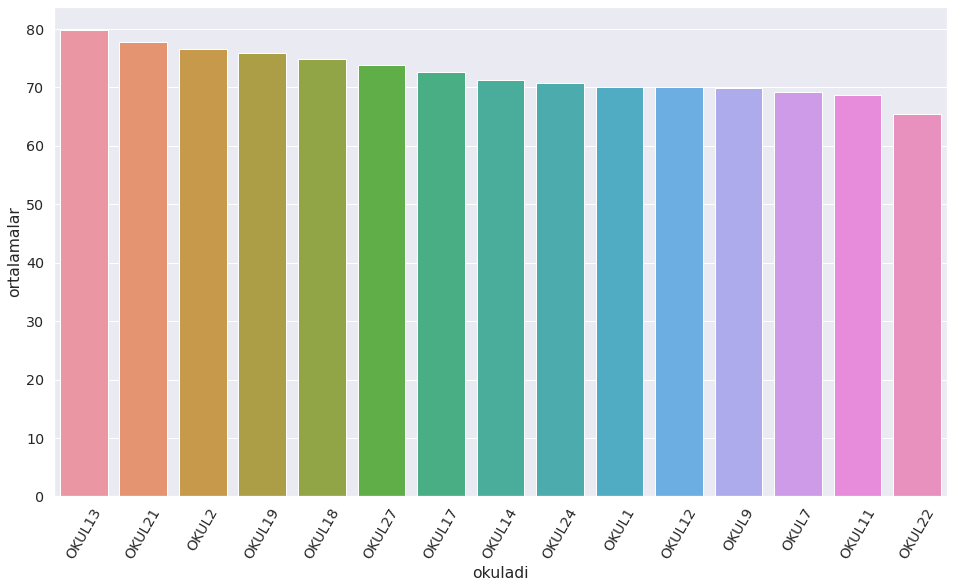

In [ ]:
sns.set_palette("RdBu")
plt.figure(figsize=(16,9))
sns.set(font_scale=1.3)
sns.barplot(x="okuladi", y="ortalamalar", data=okul_ortalamalari.sort_values(by=["ortalamalar"], ascending=False))
plt.xticks(rotation=60)
plt.show()

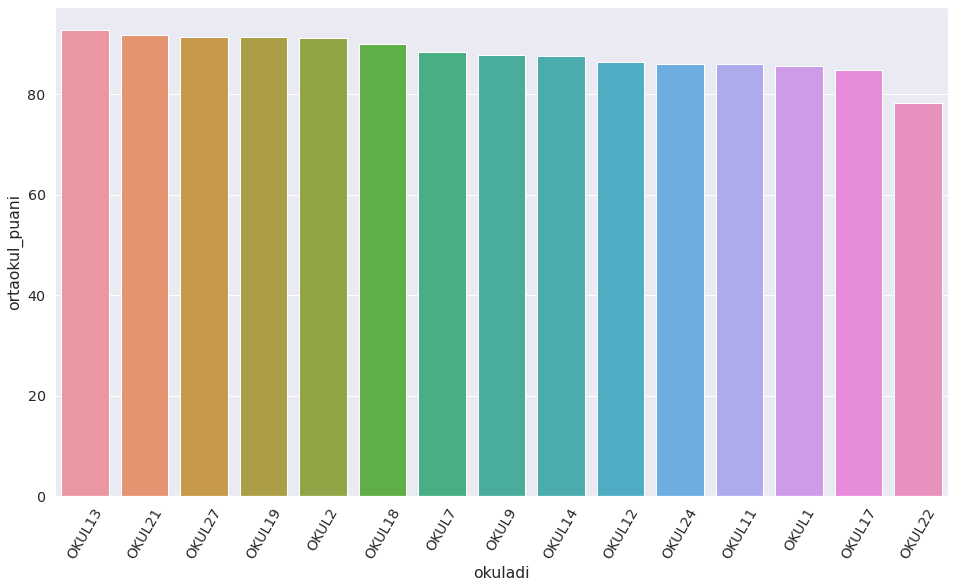

In [ ]:
sns.set_palette("RdBu")
plt.figure(figsize=(16,9))
sns.set(font_scale=1.3)
sns.barplot(x="okuladi", y="ortaokul_puani", data=okul_ortalamalari.sort_values(by=["ortaokul_puani"], ascending=False))
plt.xticks(rotation=60)
plt.show()

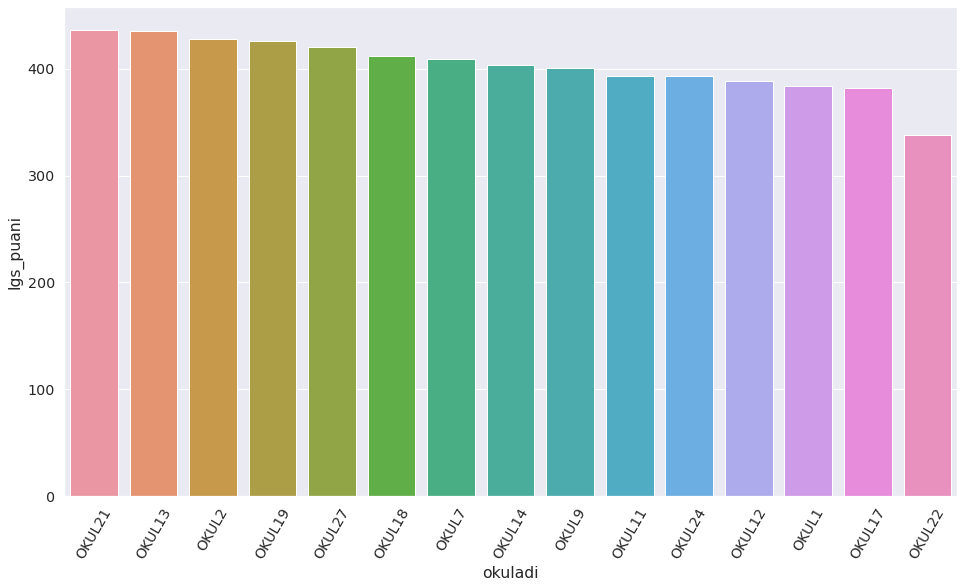

In [ ]:
sns.set_palette("RdBu")
plt.figure(figsize=(16,9))
sns.set(font_scale=1.3)
sns.barplot(x="okuladi", y="lgs_puani", data=okul_ortalamalari.sort_values(by=["lgs_puani"], ascending=False))
plt.xticks(rotation=60)
plt.show()

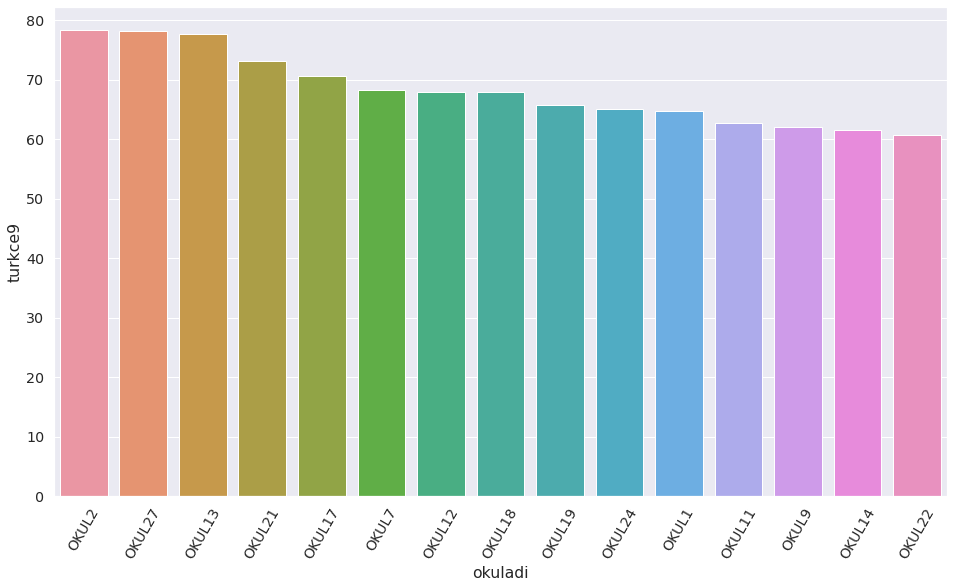

In [ ]:
sns.set_palette("RdBu")
plt.figure(figsize=(16,9))
sns.set(font_scale=1.3)
sns.barplot(x="okuladi", y="turkce9", data=okul_ortalamalari.sort_values(by=["turkce9"], ascending=False))
plt.xticks(rotation=60)
plt.show()

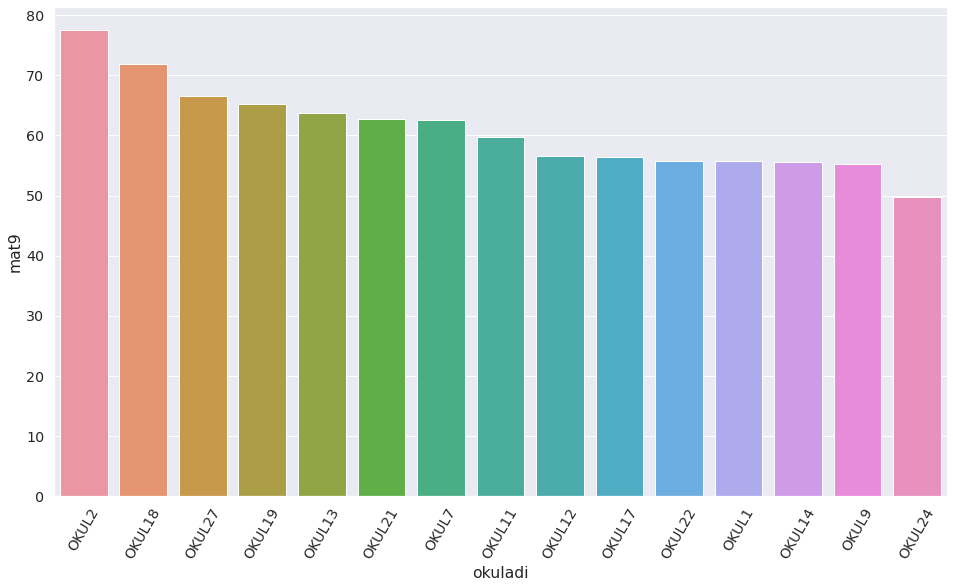

In [ ]:
sns.set_palette("RdBu")
plt.figure(figsize=(16,9))
sns.set(font_scale=1.3)
sns.barplot(x="okuladi", y="mat9", data=okul_ortalamalari.sort_values(by=["mat9"], ascending=False))
plt.xticks(rotation=60)
plt.show()

#Okulların özelliklerinin ve not ortalamalarının incelenmesi

## Okul özelliklerini içeren veriseti ile ortalama sütunu birleştirilmesi

In [ ]:
df_okul_ozellik = pd.merge(df_okullar, okul_ortalamalari, how='right', left_on='okul_adi', right_on='okuladi')

In [ ]:
df_okul_ozellik.drop(columns = "okuladi", inplace=True)

In [ ]:
df_okul_ozellik

,okul_adi,ogr_sayisi,tasimali_ogr_say,bina_alani,bahce_alani,kapali_spor_alani,acik_spor_alani,kantin_alani,cok_amacli_salon,tasarim_atolyesi,fen_laboratuvari,bilisim_laboratuvari,derslik_sayisi,personel_hizmet_suresi,personel_yas,yuksek_devam,yuksek_mezun,doktora_devam_personel,doktora_mezunu,lgs_puani,ortaokul_puani,turkce9,mat9,ortalamalar
0,OKUL22,735,199,1298.0,6500.0,0,0.0,50.0,1,0,0,1,24,15.0,35.0,2,13,0,0,337.703229,78.277214,60.718393,55.807321,65.365362
1,OKUL11,566,0,2000.0,5200.0,0,0.0,30.0,1,0,0,0,19,13.0,35.0,0,14,0,0,393.359919,85.938734,62.759770,59.796552,68.708429
2,OKUL7,580,210,720.0,6000.0,820,50.0,30.0,0,0,0,1,21,5.0,35.0,1,2,1,0,409.109218,88.360865,68.273968,62.578095,69.271958
3,OKUL9,648,172,1107.0,7350.0,128,700.0,85.0,1,1,1,0,19,15.0,37.0,2,8,0,0,400.974305,87.750258,62.048788,55.180303,69.922614
4,OKUL12,669,60,1500.0,6600.0,750,0.0,400.0,1,0,0,0,22,14.0,36.0,4,13,2,0,387.949383,86.327079,68.015970,56.569403,70.032667
5,OKUL1,629,0,3225.0,650.0,310,1000.0,50.0,1,0,1,0,25,21.0,41.0,0,14,0,0,383.301310,85.530186,64.727763,55.698553,70.044474
6,OKUL24,886,69,2604.0,1433.0,0,1220.0,75.0,0,0,0,0,26,4.0,37.0,0,7,1,0,392.815698,86.022778,65.097222,49.723056,70.745463
7,OKUL14,593,136,5560.0,8551.0,0,200.0,80.0,1,0,0,0,20,13.0,34.0,1,8,0,0,403.235214,87.575313,61.552344,55.559063,71.217839
8,OKUL17,738,169,8937.0,7021.0,0,1500.0,194.0,0,1,1,0,27,13.0,35.0,1,14,0,0,382.245213,84.820513,70.692308,56.471795,72.719771
9,OKUL27,778,0,5340.0,3669.0,0,0.0,742.0,1,0,0,0,25,15.0,33.0,0,9,2,0,419.833954,91.354741,78.127436,66.628205,73.921368


In [ ]:
df_okul_ozellik.value_counts()

okul_adi  ogr_sayisi  tasimali_ogr_say  bina_alani  bahce_alani  kapali_spor_alani  acik_spor_alani  kantin_alani  cok_amacli_salon  tasarim_atolyesi  fen_laboratuvari  bilisim_laboratuvari  derslik_sayisi  personel_hizmet_suresi  personel_yas  yuksek_devam  yuksek_mezun  doktora_devam_personel  doktora_mezunu  lgs_puani   ortaokul_puani  turkce9    mat9       ortalamalar
OKUL9     648         172               1107.0      7350.0       128                700.0            85.0          1                 1                 1                 0                     19              15.0                    37.0          2             8             0                       0               400.974305  87.750258       62.048788  55.180303  69.922614      1
OKUL7     580         210               720.0       6000.0       820                50.0             30.0          0                 0                 0                 1                     21              5.0                     35.0          

Doktora mezunu eğitimci olmadığından `doktora_mezunu` sütunu verisetinden kaldırılmıştır.

In [ ]:
df_okul_ozellik = df_okul_ozellik.drop("doktora_mezunu", axis=1)

###Okul özellikleri ile not ortalamalarının ilişkilerinin incelenmesi

In [ ]:
reduced_col_names = df_okul_ozellik.corr().abs()["ortalamalar"].index
df_okul_ozellik[reduced_col_names].corr()["ortalamalar"]

ogr_sayisi               -0.059932
tasimali_ogr_say         -0.348012
bina_alani                0.257533
bahce_alani               0.271695
kapali_spor_alani        -0.232353
acik_spor_alani           0.372017
kantin_alani              0.166056
derslik_sayisi           -0.070872
personel_hizmet_suresi    0.050494
personel_yas              0.496639
yuksek_devam             -0.282540
yuksek_mezun             -0.114613
doktora_devam_personel   -0.024734
lgs_puani                 0.865084
ortaokul_puani            0.867464
turkce9                   0.763964
mat9                      0.614869
ortalamalar               1.000000
Name: ortalamalar, dtype: float64

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5, 15.5, 16.5, 17.5]),
 <a list of 18 Text major ticklabel objects>)

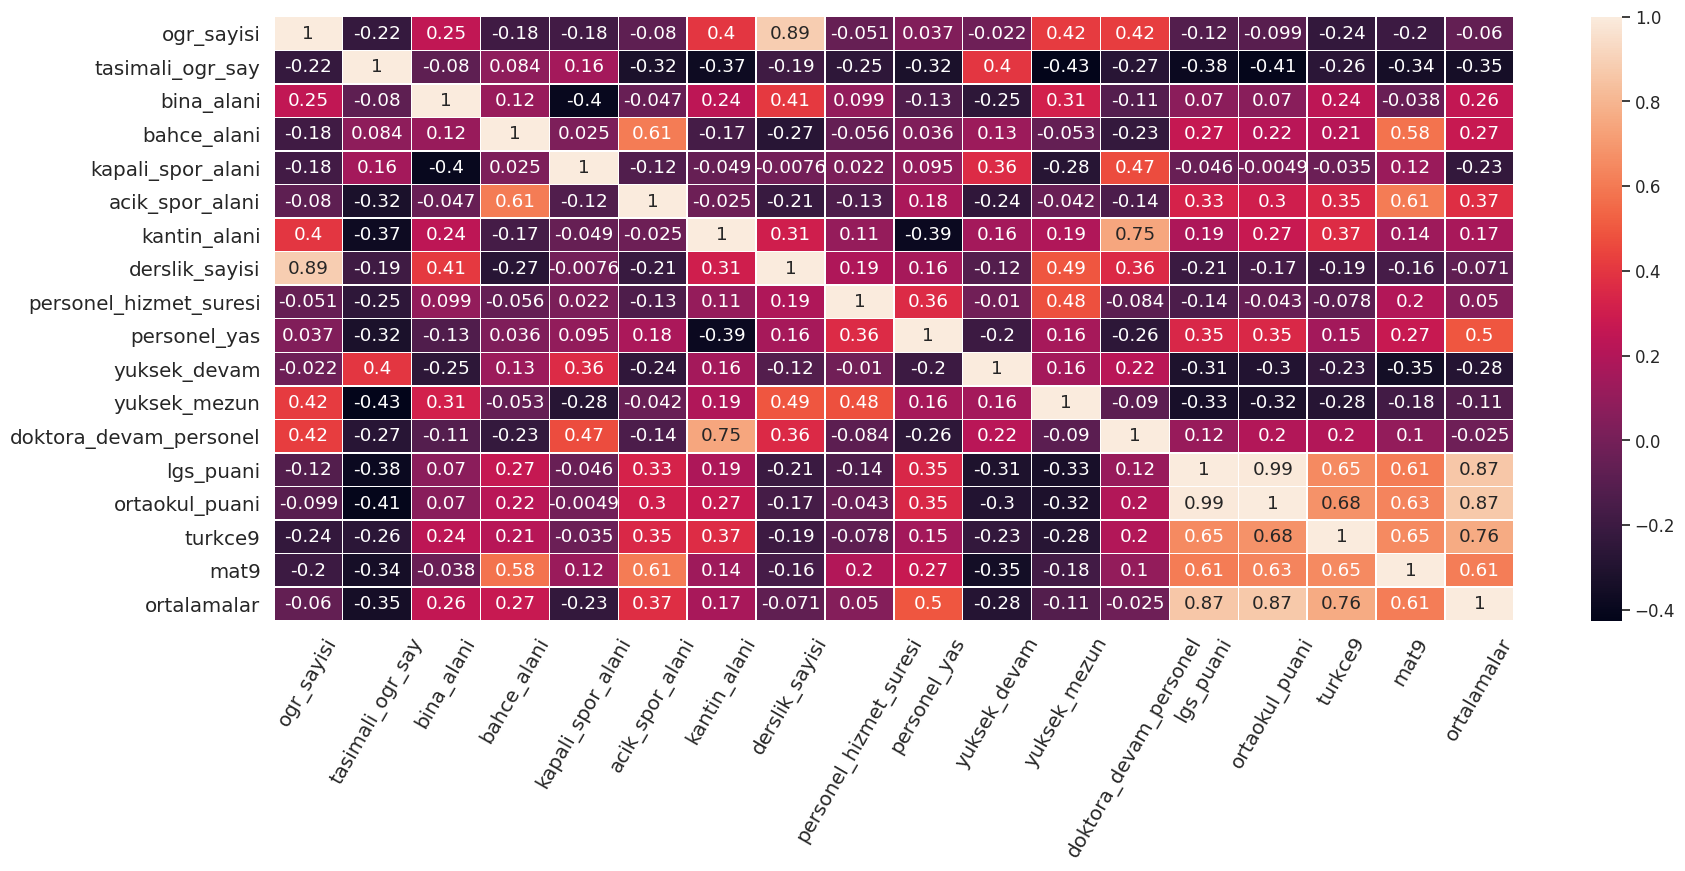

In [ ]:
fig, ax = plt.subplots(figsize=(20,8), dpi=100) 
sns.set(font_scale=1.1)
sns.heatmap(df_okul_ozellik[reduced_col_names].corr(), annot=True, linewidths=0.3, ax=ax)
plt.xticks(rotation=60)

---

##Sene sonu notlarının teker teker incelenmesi

In [ ]:
yeni_df = filtered_df[["okuladi", "ort9", "ort10", "ort11", "lgs_puani", "mat9", "turkce9", "ortaokul_puani"]]

In [ ]:
yeni_df

,okuladi,ort9,ort10,ort11,lgs_puani,mat9,turkce9,ortaokul_puani
0,OKUL1,68.43,70.77,74.38,377.000000,55.63,56.45,93.4088
1,OKUL1,67.78,71.45,74.89,393.000000,48.63,58.63,80.0000
2,OKUL1,83.29,86.07,40.46,390.000000,87.25,81.13,90.0000
3,OKUL1,63.78,61.94,62.92,378.000000,33.13,51.38,80.0000
4,OKUL1,69.24,70.90,77.12,394.601327,58.75,72.25,86.0000
...,...,...,...,...,...,...,...,...
1079,OKUL27,81.92,79.03,74.60,439.000000,81.50,85.85,95.0000
1080,OKUL27,77.08,74.29,71.49,426.000000,72.00,77.25,91.0000
1081,OKUL27,73.33,83.45,82.51,410.000000,83.50,70.33,93.3000
1082,OKUL27,74.63,71.63,71.81,407.000000,65.15,68.25,95.0000


In [ ]:
yeni_ort = pd.merge(df_okullar,yeni_df , how='right', left_on='okul_adi', right_on='okuladi')

In [ ]:
yeni_ort.drop(columns="okuladi", axis=1, inplace=True)

In [ ]:
yeni_ort

,okul_adi,ogr_sayisi,tasimali_ogr_say,bina_alani,bahce_alani,kapali_spor_alani,acik_spor_alani,kantin_alani,cok_amacli_salon,tasarim_atolyesi,fen_laboratuvari,bilisim_laboratuvari,derslik_sayisi,personel_hizmet_suresi,personel_yas,yuksek_devam,yuksek_mezun,doktora_devam_personel,doktora_mezunu,ort9,ort10,ort11,lgs_puani,mat9,turkce9,ortaokul_puani
0,OKUL1,629,0,3225.0,650.0,310,1000.0,50.0,1,0,1,0,25,21.0,41.0,0,14,0,0,68.43,70.77,74.38,377.000000,55.63,56.45,93.4088
1,OKUL1,629,0,3225.0,650.0,310,1000.0,50.0,1,0,1,0,25,21.0,41.0,0,14,0,0,67.78,71.45,74.89,393.000000,48.63,58.63,80.0000
2,OKUL1,629,0,3225.0,650.0,310,1000.0,50.0,1,0,1,0,25,21.0,41.0,0,14,0,0,83.29,86.07,40.46,390.000000,87.25,81.13,90.0000
3,OKUL1,629,0,3225.0,650.0,310,1000.0,50.0,1,0,1,0,25,21.0,41.0,0,14,0,0,63.78,61.94,62.92,378.000000,33.13,51.38,80.0000
4,OKUL1,629,0,3225.0,650.0,310,1000.0,50.0,1,0,1,0,25,21.0,41.0,0,14,0,0,69.24,70.90,77.12,394.601327,58.75,72.25,86.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
844,OKUL27,778,0,5340.0,3669.0,0,0.0,742.0,1,0,0,0,25,15.0,33.0,0,9,2,0,81.92,79.03,74.60,439.000000,81.50,85.85,95.0000
845,OKUL27,778,0,5340.0,3669.0,0,0.0,742.0,1,0,0,0,25,15.0,33.0,0,9,2,0,77.08,74.29,71.49,426.000000,72.00,77.25,91.0000
846,OKUL27,778,0,5340.0,3669.0,0,0.0,742.0,1,0,0,0,25,15.0,33.0,0,9,2,0,73.33,83.45,82.51,410.000000,83.50,70.33,93.3000
847,OKUL27,778,0,5340.0,3669.0,0,0.0,742.0,1,0,0,0,25,15.0,33.0,0,9,2,0,74.63,71.63,71.81,407.000000,65.15,68.25,95.0000


In [ ]:
df_yeni_ortalamalar = pd.DataFrame(yeni_ort.loc[:, ["ort9", "ort10", "ort11"]].mean(axis=1), columns=["ortalamalar"])

In [ ]:
df_yeni_ortalamalar

,ortalamalar
0,71.193333
1,71.373333
2,69.940000
3,62.880000
4,72.420000
...,...
844,78.516667
845,74.286667
846,79.763333
847,72.690000


In [ ]:
df_yeni_ortalamalar = pd.merge(yeni_ort, df_yeni_ortalamalar, left_index=True, right_index=True)

In [ ]:
df_yeni_ortalamalar

,okul_adi,ogr_sayisi,tasimali_ogr_say,bina_alani,bahce_alani,kapali_spor_alani,acik_spor_alani,kantin_alani,cok_amacli_salon,tasarim_atolyesi,fen_laboratuvari,bilisim_laboratuvari,derslik_sayisi,personel_hizmet_suresi,personel_yas,yuksek_devam,yuksek_mezun,doktora_devam_personel,doktora_mezunu,ort9,ort10,ort11,lgs_puani,mat9,turkce9,ortaokul_puani,ortalamalar
0,OKUL1,629,0,3225.0,650.0,310,1000.0,50.0,1,0,1,0,25,21.0,41.0,0,14,0,0,68.43,70.77,74.38,377.000000,55.63,56.45,93.4088,71.193333
1,OKUL1,629,0,3225.0,650.0,310,1000.0,50.0,1,0,1,0,25,21.0,41.0,0,14,0,0,67.78,71.45,74.89,393.000000,48.63,58.63,80.0000,71.373333
2,OKUL1,629,0,3225.0,650.0,310,1000.0,50.0,1,0,1,0,25,21.0,41.0,0,14,0,0,83.29,86.07,40.46,390.000000,87.25,81.13,90.0000,69.940000
3,OKUL1,629,0,3225.0,650.0,310,1000.0,50.0,1,0,1,0,25,21.0,41.0,0,14,0,0,63.78,61.94,62.92,378.000000,33.13,51.38,80.0000,62.880000
4,OKUL1,629,0,3225.0,650.0,310,1000.0,50.0,1,0,1,0,25,21.0,41.0,0,14,0,0,69.24,70.90,77.12,394.601327,58.75,72.25,86.0000,72.420000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
844,OKUL27,778,0,5340.0,3669.0,0,0.0,742.0,1,0,0,0,25,15.0,33.0,0,9,2,0,81.92,79.03,74.60,439.000000,81.50,85.85,95.0000,78.516667
845,OKUL27,778,0,5340.0,3669.0,0,0.0,742.0,1,0,0,0,25,15.0,33.0,0,9,2,0,77.08,74.29,71.49,426.000000,72.00,77.25,91.0000,74.286667
846,OKUL27,778,0,5340.0,3669.0,0,0.0,742.0,1,0,0,0,25,15.0,33.0,0,9,2,0,73.33,83.45,82.51,410.000000,83.50,70.33,93.3000,79.763333
847,OKUL27,778,0,5340.0,3669.0,0,0.0,742.0,1,0,0,0,25,15.0,33.0,0,9,2,0,74.63,71.63,71.81,407.000000,65.15,68.25,95.0000,72.690000


In [ ]:
df_yeni_ortalamalar.ortalamalar

0      71.193333
1      71.373333
2      69.940000
3      62.880000
4      72.420000
         ...    
844    78.516667
845    74.286667
846    79.763333
847    72.690000
848    63.753333
Name: ortalamalar, Length: 849, dtype: float64

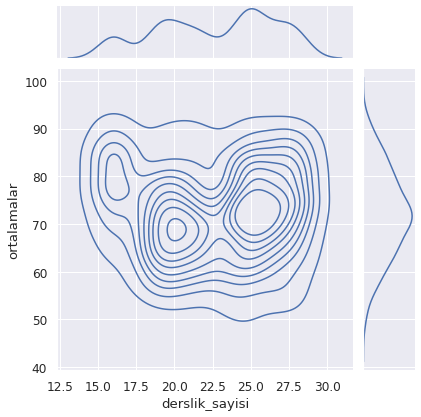

In [ ]:
sns.jointplot(x = df_yeni_ortalamalar.derslik_sayisi, y = df_yeni_ortalamalar.ortalamalar, kind="kde")

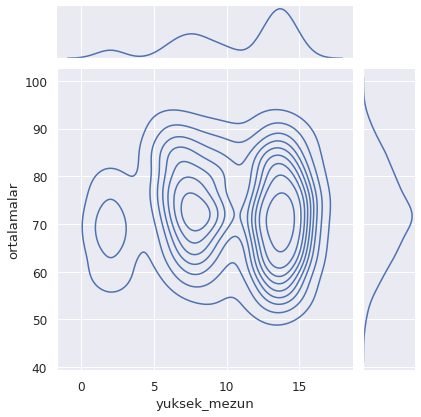

In [ ]:
sns.jointplot(x = df_yeni_ortalamalar.yuksek_mezun, y = df_yeni_ortalamalar.ortalamalar, kind="kde")

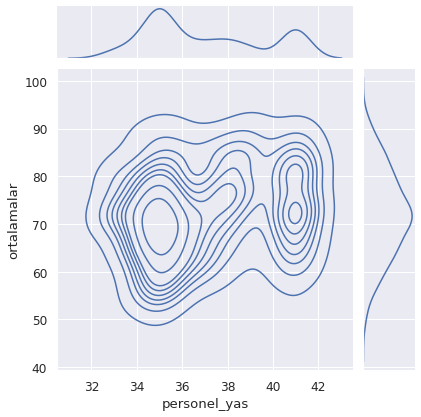

In [ ]:
sns.jointplot(x = df_yeni_ortalamalar.personel_yas, y = df_yeni_ortalamalar.ortalamalar, kind="kde")

#Okullara göre not ortalamalarının dağılımları

In [ ]:
df_sorted = df_yeni_ortalamalar.sort_values(by=["ortalamalar"], ascending=False)

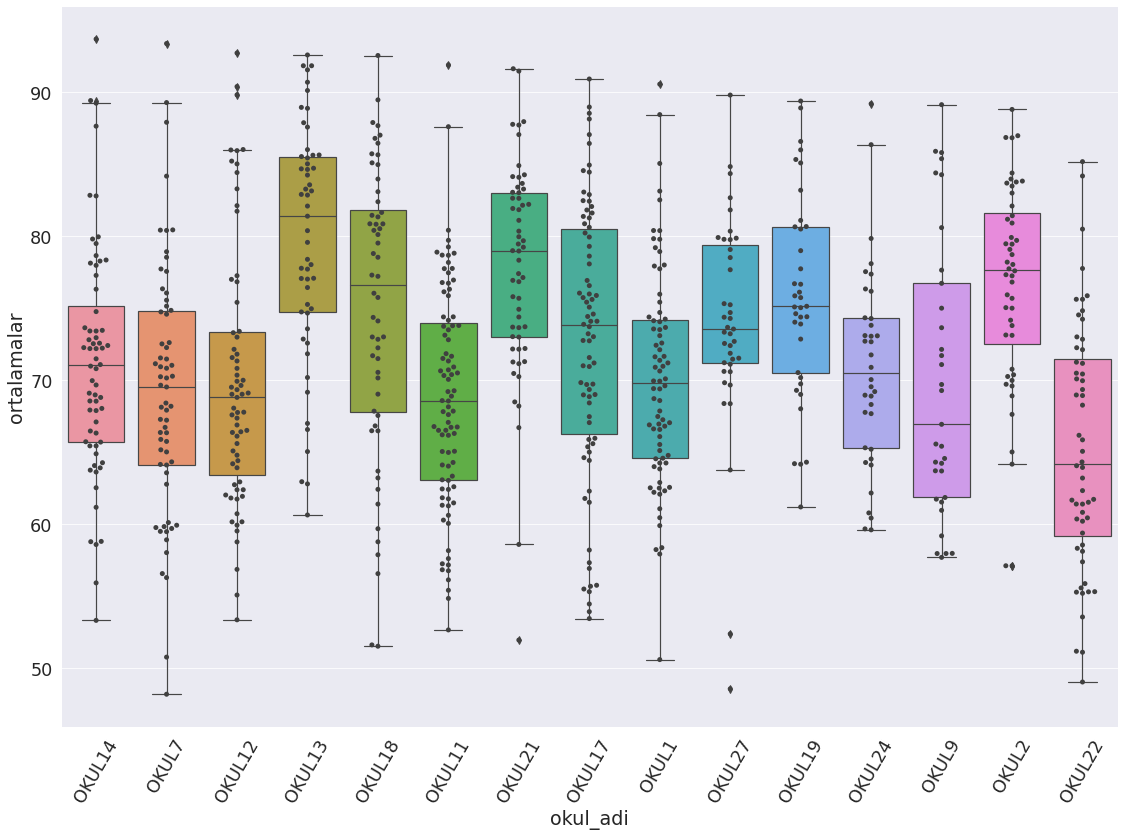

In [ ]:
plt.figure(figsize=(16,12))
sns.set_context("paper", font_scale=2)
ax = sns.boxplot(x = df_sorted.okul_adi, y = df_sorted.ortalamalar)
ax = sns.swarmplot(x="okul_adi", y="ortalamalar", data=df_sorted.sort_values(by=["ortalamalar"], ascending=False), color=".25")
plt.xticks(rotation=60)                                                               
plt.tight_layout()  
plt.show()

In [ ]:
df_sorted

,okul_adi,ogr_sayisi,tasimali_ogr_say,bina_alani,bahce_alani,kapali_spor_alani,acik_spor_alani,kantin_alani,cok_amacli_salon,tasarim_atolyesi,fen_laboratuvari,bilisim_laboratuvari,derslik_sayisi,personel_hizmet_suresi,personel_yas,yuksek_devam,yuksek_mezun,doktora_devam_personel,doktora_mezunu,ort9,ort10,ort11,lgs_puani,mat9,turkce9,ortaokul_puani,ortalamalar
482,OKUL14,593,136,5560.0,8551.0,0,200.0,80.0,1,0,0,0,20,13.0,34.0,1,8,0,0,92.08,93.44,95.6000,475.000000,95.13,86.75,96.0,93.706667
141,OKUL7,580,210,720.0,6000.0,820,50.0,30.0,0,0,0,1,21,5.0,35.0,1,2,1,0,94.29,94.37,91.5200,420.000000,91.38,96.88,97.0,93.393333
360,OKUL12,669,60,1500.0,6600.0,750,0.0,400.0,1,0,0,0,22,14.0,36.0,4,13,2,0,89.66,92.17,96.3782,402.000000,93.13,93.00,90.0,92.736067
401,OKUL13,436,127,1485.0,3215.0,0,0.0,100.0,1,0,1,0,16,14.0,39.0,1,6,0,0,90.11,93.47,94.2200,472.000000,85.13,85.63,95.0,92.600000
597,OKUL18,771,64,3130.0,8000.0,500,500.0,60.0,1,0,0,0,28,22.0,41.0,0,10,1,0,90.60,91.88,95.2051,451.000000,65.60,60.63,93.0,92.561700
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
126,OKUL7,580,210,720.0,6000.0,820,50.0,30.0,0,0,0,1,21,5.0,35.0,1,2,1,0,51.54,50.56,50.1300,333.507285,36.38,45.59,76.0,50.743333
63,OKUL1,629,0,3225.0,650.0,310,1000.0,50.0,1,0,1,0,25,21.0,41.0,0,14,0,0,48.83,51.66,51.2200,298.000000,26.88,33.00,60.0,50.570000
746,OKUL22,735,199,1298.0,6500.0,0,0.0,50.0,1,0,0,1,24,15.0,35.0,2,13,0,0,48.25,54.08,44.7100,300.000000,32.75,22.57,72.0,49.013333
818,OKUL27,778,0,5340.0,3669.0,0,0.0,742.0,1,0,0,0,25,15.0,33.0,0,9,2,0,50.60,52.78,42.2400,315.000000,33.25,38.57,71.0,48.540000
